## Network analysis

In [1]:
import movekit as mkit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, convex_hull_plot_2d, delaunay_plot_2d
import networkx as nx
import collections

In [2]:
path = "datasets/fish-5-features.csv"
data = mkit.read_data(path)
data.head()

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped,turning
0,1,312,405.29,417.76,0.0,0.210217,-0.018039,0.0,1,0.0
1000,1,511,369.99,428.78,0.0,0.020944,0.000236,0.0,1,0.0
2000,1,607,390.33,405.89,0.0,0.070235,0.004961,0.0,1,0.0
3000,1,811,445.15,411.94,0.0,0.370500,0.017482,0.0,1,0.0
4000,1,905,366.06,451.76,0.0,0.118000,-0.006333,0.0,1,0.0


### Obtaining a list of graphs, based on delaunay triangulations
Caclulate a network list for each timestep based on delaunay. trinangulation. Each timestep carries the respective graph with data attached to nodes, edges and graph. Just insert time and animal specific x and y coordinate data.

In [3]:
#Calculates a network list for each timestep based on delaunay triangulation (currently only one available)
graphs = mkit.network_time_graphlist(data)

Computing euclidean distance: 100%|██████████| 1000/1000 [00:03<00:00, 281.98it/s]
Extracting all absolute features: 100%|██████████| 100.0/100 [00:00<00:00, 635.13it/s]
Calculating centroid distances: 100%|██████████| 1000/1000 [00:05<00:00, 180.57it/s]
/Users/timkleinlein/opt/anaconda3/lib/python3.9/site-packages/movekit-0.0.post1.dev309+g9dd9d10.d20220314-py3.9.egg/movekit/feature_extraction.py:404: UserWarning: Recalculating centroid-distances, since not found in input dataset!
  warnings.warn(
Calculating centroid distances: 100%|██████████| 1000/1000 [00:05<00:00, 185.87it/s]
Computing centroid direction: 100%|██████████| 100.0/100 [00:00<00:00, 923.02it/s]
Calculating network list:   0%|          | 0/1000 [00:00<?, ?it/s]/Users/timkleinlein/opt/anaconda3/lib/python3.9/site-packages/movekit-0.0.post1.dev309+g9dd9d10.d20220314-py3.9.egg/movekit/network.py:58: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  nx.set_node_attributes(G, data_groups_time[i

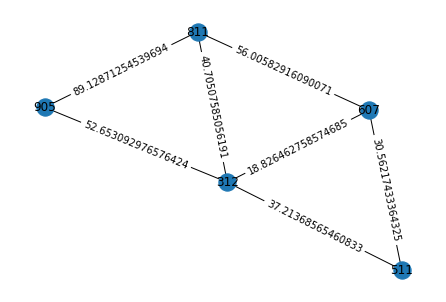

In [4]:
# Visualizing the graph for time step '3'-

labels = nx.get_node_attributes(graphs[2], 'animal_id')

pos = nx.spring_layout(graphs[2])


nx.draw(graphs[2], pos)
node_labels = nx.get_node_attributes(graphs[2], 'animal_id')
nx.draw_networkx_labels(graphs[2], pos=pos, labels=node_labels)

edge_labels = nx.get_edge_attributes(graphs[2], 'distance')
nx.draw_networkx_edge_labels(graphs[2], pos=pos, edge_labels=edge_labels)
plt.show()

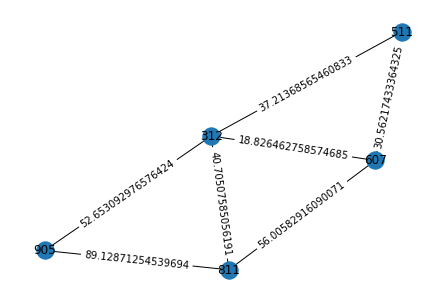

In [8]:
pos = nx.spring_layout(graphs[2])

nx.draw(graphs[2], pos)
node_labels = nx.get_node_attributes(graphs[2], 'animal_id')
nx.draw_networkx_labels(graphs[2], pos=pos, labels=node_labels)

edge_labels = nx.get_edge_attributes(graphs[2], 'distance')
nx.draw_networkx_edge_labels(graphs[2], pos=pos, edge_labels=edge_labels)
plt.show()

In [9]:
# Display all graph attributes at time 3
graphs[2].graph

{'time': 3,
 'x_centroid': 395.392,
 'y_centroid': 423.234,
 'medoid': 312,
 'polarization': 0.323949515577163,
 'total_dist': 1.025155304577569,
 'mean_speed': 0.1556100759950875,
 'mean_acceleration': -0.0003387029795760603,
 'mean_distance_centroid': 29.691399999999998,
 'centroid_direction': 0.00022258126213459568}

In [10]:
# Display all edges at time 3
graphs[2].edges

EdgeView([(312, 811), (312, 607), (312, 511), (312, 905), (811, 905), (811, 607), (607, 511)])

In [11]:
# Display the distance of one node pair at time 3
graphs[2].edges[312, 811]

{'distance': 40.70507585056191}

In [12]:
# Display all attributes of node 312 at time 3
graphs[2].nodes[312]

{'time': 3,
 'animal_id': 312,
 'x': 405.31,
 'y': 417.07,
 'distance': 0.30000000000001137,
 'average_speed': 0.17472339975245438,
 'average_acceleration': -0.0180393818878736,
 'direction': 0.02059048958256376,
 'stopped': 1,
 'turning': -0.007567397809363205,
 'x_centroid': 395.392,
 'y_centroid': 423.234,
 'medoid': 312.0,
 'distance_to_centroid': 11.677}

### Network analysis

The networkx package enables to analyze the extracted graphs over time. See doc: https://networkx.org/documentation/stable/index.html

In [13]:
len(graphs)

1000

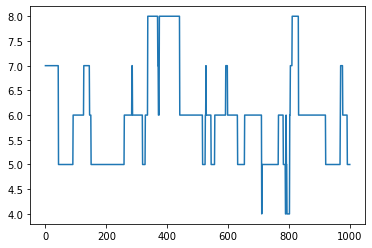

In [14]:
# Plot number of nodes over time
num_edges = []
for G in graphs: 
    num_edges.append(nx.number_of_edges(G))

plt.plot(num_edges)
plt.show()

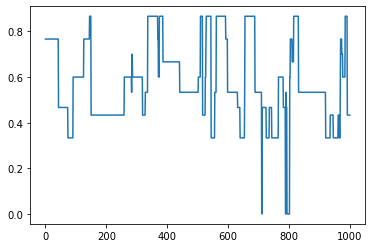

In [15]:
# Plot clustering coefficient over time
avg_cluster = []
for G in graphs: 
    avg_cluster.append(nx.average_clustering(G))

plt.plot(avg_cluster)
plt.show()

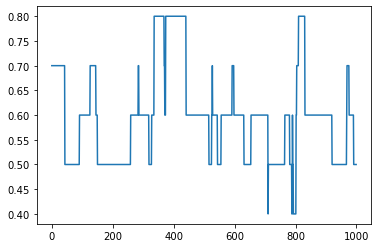

In [16]:
# Plot density over time
dens = []
for G in graphs: 
    dens.append(nx.density(G))

plt.plot(dens)
plt.show()

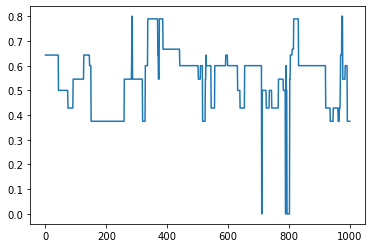

In [17]:
# Plot transitivity over time
trans = []
for G in graphs: 
    trans.append(nx.transitivity(G))

plt.plot(trans)
plt.show()

__Compute features for individiual nodes__

In [18]:
# Pick the first graph 
G = graphs[0]

In [19]:
# Degree 
dict(G.degree())

{312: 4, 811: 3, 905: 2, 607: 3, 511: 2}

In [20]:
# Degree centraility 
nx.degree_centrality(G)

{312: 1.0, 811: 0.75, 905: 0.5, 607: 0.75, 511: 0.5}

In [21]:
# Clustering coefficient 
nx.clustering(G)

{312: 0.5,
 811: 0.6666666666666666,
 905: 1.0,
 607: 0.6666666666666666,
 511: 1.0}

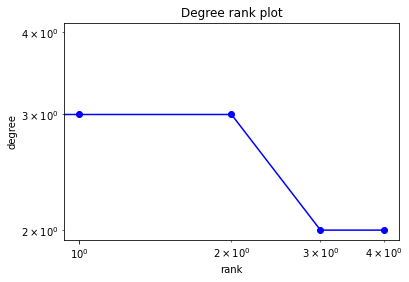

In [22]:
# Degree rank 
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmax = max(degree_sequence)

plt.loglog(degree_sequence, "b-", marker="o")
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")
plt.show()

__For more methods please check the networkX doc: https://networkx.org/documentation/stable/index.html__